In [1]:
import pandas as pd
import numpy as np
# Load the Excel file
file_path = 'Dataset.xlsx'

# Read the first sheet of the Excel file
data = pd.read_excel(file_path, sheet_name=0)

print(data.head())

   IDNO  VEMGoup  Site  DayFrmTrialToStk Region Country     DATSTR      DOADM  \
0  1001        0     1                16   AUST    AUST 2006-07-17 2006-07-18   
1  1002        0     1                17   AUST    AUST 2006-07-18 2006-07-18   
2  1003        1     1                45   AUST    AUST 2006-08-15 2006-08-15   
3  1004        1     1                46   AUST    AUST 2006-08-16 2006-08-16   
4  1005        0     1                53   AUST    AUST 2006-08-23 2006-08-23   

    DOSTROKE    DOASS3M  ...  THERAPYSESSUK3  THERAPYSESSUK4  MAID_PRIORNO  \
0 2006-07-17 2006-10-17  ...             NaN             NaN           NaN   
1 2006-07-18 2006-10-20  ...             NaN             NaN           NaN   
2 2006-08-15 2006-11-17  ...             NaN             NaN           NaN   
3 2006-08-16 2006-11-14  ...             NaN             NaN           NaN   
4 2006-08-23 2006-11-28  ...             NaN             NaN           NaN   

   MAID_POST3MTHS  MAID_POST12MTHS  RANKIN3m

In [2]:
print(f'Shape: {data.shape}')

Shape: (2104, 293)


In [3]:
# Get the columns of the DataFrame
columns = data.columns

# Initialize a dictionary to store NaN counts per column
nan_counts = {}

# Calculate NaN counts for each column
for column in columns:
    nan_count = data[column].isna().sum()
    nan_counts[column] = nan_count

# Prepare a summary table with NaN counts and percentage of missing values
nan_summary = pd.DataFrame({
    "Column": nan_counts.keys(),
    "NaN Count": nan_counts.values(),
    "Percentage Missing (%)": [(count / len(data)) * 100 for count in nan_counts.values()]
})

# Filter rows where NaN Count is greater than 0
nan_rows = nan_summary[nan_summary["NaN Count"] > 0]

# Print the result
print("Columns with NaN values:")
print(nan_rows)

Columns with NaN values:
              Column  NaN Count  Percentage Missing (%)
15      hour_stk_mob         26                1.235741
19          ASSIS13M       1317               62.595057
20         LIVRESP3M       1576               74.904943
23         ASSIS112M       1494               71.007605
24        LIVRESP12M       1640               77.946768
..               ...        ...                     ...
283   THERAPYSESSUK3       2094               99.524715
284   THERAPYSESSUK4       2100               99.809886
285     MAID_PRIORNO       1243               59.077947
286   MAID_POST3MTHS       1243               59.077947
287  MAID_POST12MTHS       1243               59.077947

[180 rows x 3 columns]


In [4]:
# Select specified columns
selected_columns = ['IDNO', 'RANKIN3m', 'RANKIN12m', 'U_3m', 'U', 'age', 'SEX']

# Replace values of 777 or 888 with NaN in specific columns and drop rows with NaN
new_dataset = data[selected_columns].replace(
    {'U_3m': {777: np.nan, 888: np.nan},
     'U': {777: np.nan, 888: np.nan},
     'RANKIN3m': {777: np.nan, 888: np.nan},
     'RANKIN12m': {777: np.nan, 888: np.nan}}
).dropna()

# Display the resulting dataset
print(new_dataset)

       IDNO  RANKIN3m  RANKIN12m    U_3m       U    age  SEX
0      1001       2.0        2.0  0.7981  0.6862  61.23    1
1      1002       2.0        1.0  0.1755  0.4811  70.31    2
2      1003       2.0        2.0  0.9451  1.0000  29.21    1
3      1004       2.0        1.0  0.7452  0.7456  85.88    2
4      1005       2.0        1.0  0.6500  0.5253  81.07    2
...     ...       ...        ...     ...     ...    ...  ...
2099  58013       4.0        4.0  0.0168  0.0306  75.49    1
2100  58014       5.0        5.0  0.0184  0.0210  70.24    1
2101  58015       1.0        1.0  0.6499  0.7148  51.04    1
2102  58016       1.0        0.0  0.8666  0.8541  72.96    1
2103  58017       3.0        4.0  0.2856  0.1554  87.29    1

[1986 rows x 7 columns]


In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_dataset, test_size=0.4, random_state=42)

In [6]:
print(train_data)
print(train_data.columns)

       IDNO  RANKIN3m  RANKIN12m    U_3m       U    age  SEX
362    2110       3.0        4.0  0.1173 -0.0044  78.65    1
1672  36004       3.0        1.0  0.3136  0.8338  76.21    2
699    7068       2.0        2.0  0.4256  0.2825  48.41    1
1679  36011       6.0        6.0  0.0000  0.0000  81.27    1
1174  20038       5.0        6.0 -0.0078  0.0000  73.46    1
...     ...       ...        ...     ...     ...    ...  ...
1171  20035       4.0        4.0 -0.0094  0.3472  73.90    1
1342  26063       1.0        0.0  0.8507  1.0000  75.07    2
884   12060       1.0        3.0  0.8443  0.4191  63.50    1
1519  27112       3.0        3.0  0.2862  0.3019  47.45    1
1167  20031       2.0        1.0  0.8442  1.0000  48.62    1

[1191 rows x 7 columns]
Index(['IDNO', 'RANKIN3m', 'RANKIN12m', 'U_3m', 'U', 'age', 'SEX'], dtype='object')


In [7]:
same_values_count = (train_data["RANKIN3m"] == train_data["RANKIN12m"]).sum()

print(f"Same values in RANKIN3m and RANKIN12m: {same_values_count}")

Same values in RANKIN3m and RANKIN12m: 686


D:\Deakin University\Anacoda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


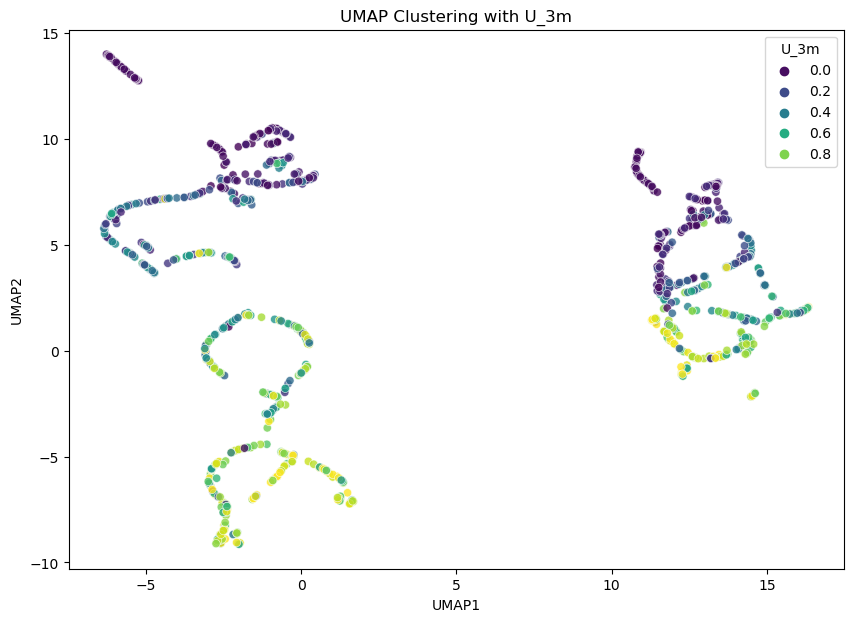

           RANKIN3m  RANKIN12m      U_3m         U
RANKIN3m   1.000000   0.862176 -0.825856 -0.768274
RANKIN12m  0.862176   1.000000 -0.788160 -0.853560
U_3m      -0.825856  -0.788160  1.000000  0.844814
U         -0.768274  -0.853560  0.844814  1.000000


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
features = ['RANKIN3m', 'RANKIN12m', 'age', 'SEX']
target = ['U_3m', 'U']

# Handle missing values
train_data.dropna(inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data[features])

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Add UMAP results to dataset
train_data['UMAP1'] = embedding[:, 0]
train_data['UMAP2'] = embedding[:, 1]

# Visualize UMAP results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='U_3m', data=train_data, palette='viridis', alpha=0.8
)
plt.title('UMAP Clustering with U_3m')
plt.show()

# Correlation analysis
print(train_data[['RANKIN3m', 'RANKIN12m', 'U_3m', 'U']].corr())


C:\Users\Admin\AppData\Local\Temp\ipykernel_10976\3243924995.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3m['Time'] = '3m'
D:\Deakin University\Anacoda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


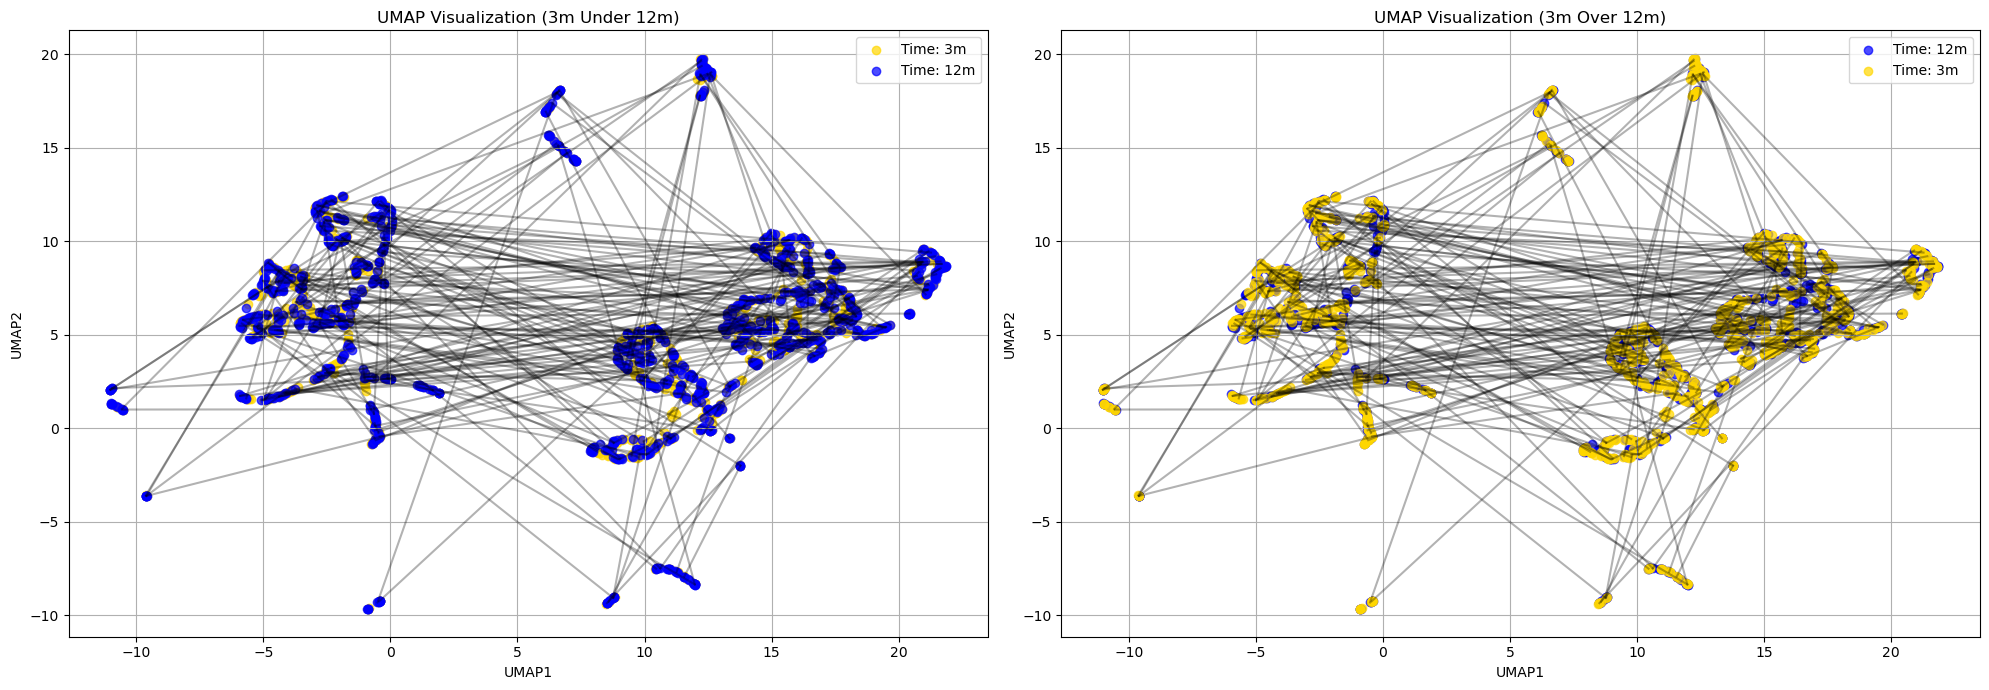

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

# Preparing data for UMAP visualization
# For 3-month data
data_3m = train_data[['RANKIN3m', 'U_3m', 'age', 'SEX']]
data_3m['Time'] = '3m'

# For 12-month data
data_12m = train_data[['RANKIN12m', 'U', 'age', 'SEX']].rename(
    columns={'RANKIN12m': 'RANKIN3m', 'U': 'U_3m'}
)
data_12m['Time'] = '12m'

# Combine both for UMAP embedding
combined_data = pd.concat([data_3m, data_12m], ignore_index=True)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(combined_data[['RANKIN3m', 'U_3m', 'age', 'SEX']])

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Add UMAP results to data
combined_data['UMAP1'] = umap_embedding[:, 0]
combined_data['UMAP2'] = umap_embedding[:, 1]

# Creating subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Colors for time points
colors = {'3m': 'gold', '12m': 'blue'}

# First plot: Default order (3m under 12m)
axes[0].set_title('UMAP Visualization (3m Under 12m)')
axes[0].set_xlabel('UMAP1')
axes[0].set_ylabel('UMAP2')
for patient_id in train_data['IDNO']:
    subset = combined_data[combined_data.index.isin([patient_id - 1, patient_id + 49])]
    axes[0].plot(subset['UMAP1'], subset['UMAP2'], 'k-', alpha=0.3)  # Connect points
for time_point in ['3m', '12m']:
    subset = combined_data[combined_data['Time'] == time_point]
    axes[0].scatter(
        subset['UMAP1'], subset['UMAP2'], label=f'Time: {time_point}', color=colors[time_point], alpha=0.7
    )
axes[0].legend()
axes[0].grid(True)

# Second plot: Reversed order (3m over 12m)
axes[1].set_title('UMAP Visualization (3m Over 12m)')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')
for patient_id in train_data['IDNO']:
    subset = combined_data[combined_data.index.isin([patient_id - 1, patient_id + 49])]
    axes[1].plot(subset['UMAP1'], subset['UMAP2'], 'k-', alpha=0.3)  # Connect points
for time_point in ['12m', '3m']:  # Reverse the order
    subset = combined_data[combined_data['Time'] == time_point]
    axes[1].scatter(
        subset['UMAP1'], subset['UMAP2'], label=f'Time: {time_point}', color=colors[time_point], alpha=0.7
    )
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
